# Exploratory analysis of the Uncertainty in the COVID-19 Trends in the Philippines

**Author:** Lou Irish Gonzales

**Driving question:** How deadly is COVID-19?  How can we present data about this question so that the uncertainty is made very clear to the user of the visualisation of the results?

In this notebook, using the csv file from the 'Our World in Data' site, we will explore the uncertainty in the trends regarding the number of  deaths in the Philippines will be explored. The true level of COVID-19 transmission may be underestimated because a substantial proportion of infected people remain undetected since they are asymptomatic and have only mild symptoms. Additionally, as the Philippines is a developing country, there is a significant portion of the population who are unable to afford testing and medical treatment which can further contribute to the under-representation. Cases may also be misdiagnosed and attributed to other diseases with similar clinical presentation, such as influenza.

Hence, to understand the uncertainty, the variables that will be specifically looked at include:

* Number of Tests
* Hospital beds per thousand
* Extreme Poverty
* GDP

This is a continuation from the Week 8 Process notebook. However, we will now look more closely into the variables that causes uncertainty.




In [5]:
# Importing the packages that will be used
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initial data exploration

## Import the data

The data will be imported from a github page containing the CSV file.

In [6]:
# Import dataset from github
url = 'https://raw.github.sydney.edu.au/awon6941/DATA3406_Group4/master/owid-covid-data.csv?token=AAABDHOLXK2SVI3KJZQWBVK7UHDXW' #has to be raw.github link 
complete = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

complete.head() #Quick look at the dataset to see the variables and check if it was imported

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


As shown above, the csv file was successfully imported from the Github repository. It is now stored in a Pandas dataframe names `complete`.  

## Quick look at the complete dataset

In this section, we would take a quick look into the dataset in order to know the variables it contains that can be analysed downstream.

In [7]:
complete.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

As shown above, for each country, the dataset contains:

* total number of cases
* total number of cases per million
* new cases per day
* total deaths
* new deaths per day
* population density
* stringency index
* gpd per capita
* extreme poverty
 and so on...

These variables will be useful in revealing insights about the trends in the Philippines and why it is different from other countries, especially since the population and exonomy of the Philippines will be different from developed countries.

## Extract Philippines data

To understand the trends in the Philippines, the data from the Philippines will be extracted from the complete dataset. This will make it easier to do further analysis later.

In [24]:
philippines = complete[complete['location'].str.contains("Philippines")]
philippines.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
36343,PHL,Asia,Philippines,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109581085.0,351.873,25.2,4.803,2.661,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
36344,PHL,Asia,Philippines,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109581085.0,351.873,25.2,4.803,2.661,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
36345,PHL,Asia,Philippines,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109581085.0,351.873,25.2,4.803,2.661,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
36346,PHL,Asia,Philippines,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109581085.0,351.873,25.2,4.803,2.661,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
36347,PHL,Asia,Philippines,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109581085.0,351.873,25.2,4.803,2.661,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699


As shown above, the data on Philippines cases were successfully extracted and stored in a Pandas dataframe called `philippines`.

# Analysis

## Analysis - Total confirmed cases

In order to understand the death rate, we first need to understand the total number of confirmed cases in the Philippines since this is directly connected to the number of deaths.

In [ ]:
# Create interactive scatter plot using plotly
total_cases = px.scatter(philippines,
                 x = 'date',
                 y = 'total_cases',
                 labels={'date': "Date",
                         'total_cases': "Total Number of Cases"},
                 title="Total Number of Confirmed Cases\nin the Philippines")

total_cases.show()


As shown above, the number of confirmed cases in the Philippines have been increasing exponentially since January with the number of cases reaching about 350, 000 by October 14.

However, it is important to note that this data may not contain all confirmed cases in the Philippines. The price of a COVID-19 test in the Philippines is roughly AU$167 which is equivalent to the salary of an average Filipino for a fortnight or even a month. Hence, several Filipinos would rather, use the money for their daily expenses rather than use it for the COVID test. As a result, the numbers may actually be greater than what is reported. Hence, testing is an important aspect to look at since there may be under-representation in the data as a result of the testing rate, thus, causing uncertainty in the results.

### Comparing the number of confirmed cases in the Philippines to other countries in Asia

To understand how culture and different demographics can impact the spread of COVID, we will compare the number of confirmed cases in the Philippines to other countries in Asia.

In [9]:
#Extract Asian data
asia = complete[complete['continent']==("Asia")]

# Create line graph
total_cases_asia = px.line(asia,
                 x = 'date',
                 y = 'total_cases',
                 color = 'location',
                 labels={'location' : "Country",
                         'date': "Date",
                         'total_cases': "Total Number of Cases"},
                 title="Total Number of Confirmed Cases in Asia")

total_cases_asia.show()

Since the plot above is an interactive line graph, you can compare Philippines with multiple Asian countries by isolating those countries.

Comparing the Philippines with other East and Southeast Asian countries, the Philippines have the highest number of confirmed cases, tied with Indonesia. It even surpasses the number of cases in China.

This may be caused by the fact that strict quarantine and lockdown was not implemented early enough compared to the other countries. Hence, we will look at the stringency index later on in order to fully understand how this may impact the differences in the number of confirmed cases.

### Confirmed cases per million in Asia

To fully understand these differences, the number of confirmed cases per million will be shown in order to take into account population differences. It is important to take note of the population differences since some countries like Singapore which had a lower number of confirmed cases has a smaller population while countries like India which had a higher number of confirmed cases has a bigger population. The population size can increase the number of confirmed cases since there are more people who can contract the disease.

In [11]:
# Create line graph
total_cases_asia_million = px.line(asia,
                 x = 'date',
                 y = 'total_cases_per_million',
                 color = 'location',
                 labels={'location' : "Country",
                         'date': "Date",
                         'total_cases_per_million': "Total Number of Cases per million"},
                 title="Total Number of Confirmed Cases in Asia Per Million")

total_cases_asia_million.show()

Since the plot above is an interactive line graph, you can compare Philippines with multiple Asian countries by isolating those countries.

In the previous section, we notice that the total number of confirmed cases in the Philippines is similar with those of Indonesia. However, now that we look at it per million, the number of cases in the Philippines is approximately 3 times higher than those in Indonesia.

Hence, this shows how important to take into account confounding factors such as population when analysing data since this can show a different result.

## Analysis - Total deaths

In this section, we will explore how deadly COVID-19 is in the Philippines. According to the definition of WHO, "A COVID-19 death is defined for surveillance purposes as a death resulting from a clinically compatible illness in a probable or confirmed COVID-19 case, unless there is a clear alternative cause of death that cannot be related to COVID-19 disease (e.g. trauma). There should be no period of complete recovery between the illness and death."

In [12]:
# Create interactive line graph using plotly
total_death = px.line(philippines,
                 x = 'date',
                 y = 'total_deaths',
                 labels={'date': "Date",
                         'total_deaths': "Total Number of Deaths"},
                 title="Total Number of Deaths\nin the Philippines")

total_death.show()

As shown above, the total number of deaths in the Philippines has been exponentially increasing since January. Almost 6400 people have died due to COVID-19. However, there is uncertainty in the death rate due to multiple factors.

Hence, to understand this further, we will first breakdown the death rate into multiple components:


* Deaths per day
* Deaths per million



### Looking at the number of deaths per day

In order to explore the death rate more, in this section, the number of deaths per day will be explored. This will help us understand how many people died each day due to COVID-19 in the Philippines.

In [18]:
# Create interactive line plot using plotly
death_daily = px.line(philippines,
                 x = 'date',
                 y = 'new_deaths',
                 labels={'date': "Date",
                         'new_deaths': "Number of Deaths"},
                 title="Number of Deaths per Day\nin the Philippines")

death_daily.show()

As shown in the plot above, the number of deaths daily have been increasing since March. It continuously goes up and down with the range increasing throughout the year. Currently, the number of deaths daily can be between 10 to 150 people. 

However, the number of deaths can be impacted by the number of confirmed cases and the population. Hence, we must take this into account when calculating the death rate.



## Death rate 

To calculate the death rate, we need to consider that the number of confirmed cases affects the number of deaths. 

According to WHO, there are two measures to calculate the mortality rate: Infection fatality ratio (IFR) and Case fatality ratio (CFR). We will calculate both of these statistics.

### Infection fatality ratio (IFR)

This estimates the proportion of deaths among all infected individuals, both symptomatic and asymptomatic. The true severity of COVID-19 can be calculate using IFR:

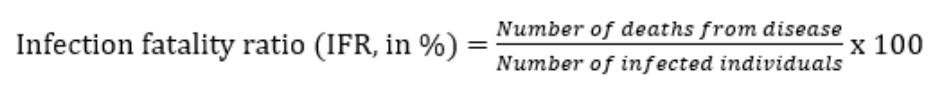

However, we cannot accurately calculate this since many cases and deaths are never confirmed to be COVID-19, and there is a lag in time between when people are infected and when they die. The dataset contains the number of confirmed cases and not the number of infected individuals. We cannot get the number of infected individuals since we do not know the number of asymptomatic individuals since they may not have taken the COVID-19 test.

### Case fatality ratio (CFR)

Case fatality ratio (CFR) is the proportion of individuals diagnosed with a disease who die from that disease and is therefore a measure of severity among detected cases.

This is calculated by:

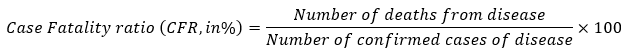

Hence, we will add an additional column in the Philippines dataset for CFR.

In [25]:
philippines['CFR'] = philippines['total_deaths'] * 100 / philippines['total_cases']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
#Create a visualisation showing the CFR per day
CFR_daily = px.line(philippines,
                 x = 'date',
                 y = 'CFR',
                 labels={'date': "Date",
                         'CFR': "CFR (%)"},
                 title="Case fatality ratio\nin the Philippines")

CFR_daily.show()

According to the graph above, the CFR have decreased and plateaued to about 1.8%. There are several reasons behind this trend. 

At the beginning of the pandemic, surveillance will most likely focus more on the symptomatic patients who seek care, so milder and asymptomatic cases are less likely to be detected, leading to overestimation of CFR; this overestimation may decrease as testing and active case finding increase. In the case of the Philippines, at the beginning of the pandemic, the number of tests done was low which may could have contributed to the overestimation of CFR. Hence, as the number of testing increased, the CFR became more consistent. 

However, there are still some biases when calculating the CFR. The CFR is under the assumption that all detected cases have been resolved, that is, all reported cases have either recovered and died. Since the pandemic is ongoing, there is still active cases present in the population. Hence, the CFR values we calculated are only estimates and may be unreliable. Additionally, there is a lag in the report dates for cases and deaths which leads to a wide variation in CFR estimates over the course of the pandemic. 

To mitigate these biases due to delays to case resolution during an ongoing pandemic, we will restrict the analysis to resolved cases:

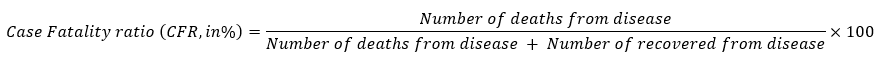

With the current dataset, there is no variable for the number of recovered and active cases. Hence, we will need to look for another dataset to use.

## Analysis - Number of Tests

According to news articles, during the beginning of the pandemic, the number of test kits available in the Philippines was significantly low. This could also contribute to the underrepresentation in the number of confirmed cases.

In order to understand the number of testing done, we will look at the number of tests done each day.

In [28]:
# Create line graph
testing_ph = px.line(philippines,
                 x = 'date',
                 y = 'new_tests_per_thousand',
                 labels={'date': "Date",
                         'new_tests_per_thousand': "Number of COVID Tests per thousand"},
                 title="Number of New COVID-19 Tests Per Thousand\nEach Day in the Philippines")

testing_ph.show()

As shown in the line graph below, in April,there was barely any testing done with only 0.003 tests performed per thousand people. Currently, the number of tests performed is still considerably low. To understand how low this is, we will compare it to other countries like Australia.

### Compare total cases in Australia and the Philippines

Before looking at the number of tests, we first need to compare the number of confirmed cases in Australia and the Philippines.


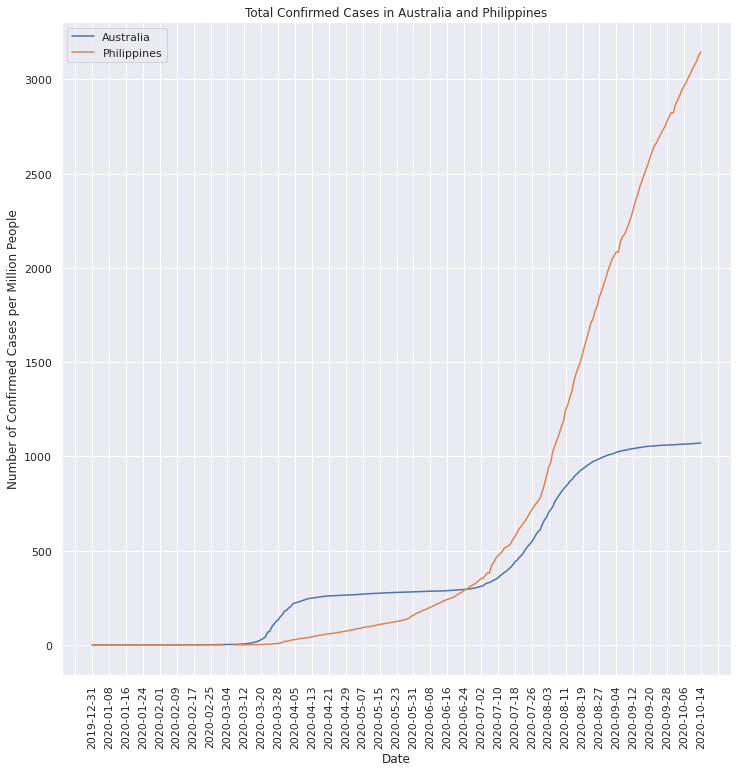

In [29]:
# Extract Australian data
australia = complete[complete['location'].str.contains("Australia")]

# Create figure and plot space
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(australia['date'], australia['total_cases_per_million'], label="Australia")
ax.plot(philippines['date'], philippines['total_cases_per_million'], label="Philippines")

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Confirmed Cases per Million People",
       title="Total Confirmed Cases in Australia and Philippines")

ax.xaxis.set_major_locator(plt.MaxNLocator(40)) #set number of ticks
plt.xticks(rotation=90)
plt.legend()

plt.show()

As you can see above, even when taking into account the population, by looking at the cases per million, the number of cases in the Philippines is significantly greater than Australia.

Although the number of cases in Australia was initially higher, they managed to control the spread which prevented it from exponentially increasing compared to the Philippines.

### Comparing number of tests in Australia and the Philippines

Now, considering the number of confirmed cases, the number of tests done in the Philippines will be explored to check if this affected the number of confirmed cases.

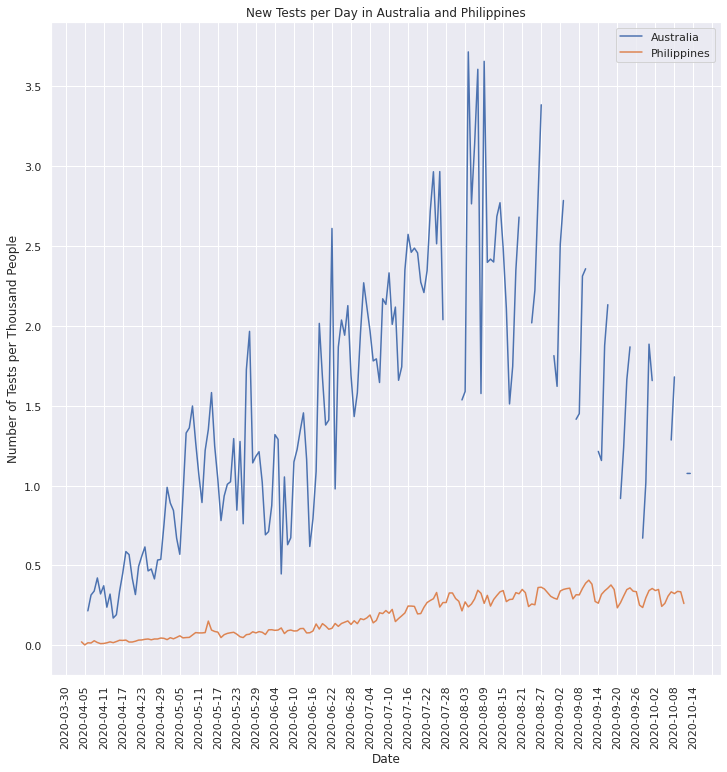

In [30]:

# Create figure and plot space
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(australia['date'], australia['new_tests_per_thousand'], label="Australia")
ax.plot(philippines['date'], philippines['new_tests_per_thousand'], label="Philippines")

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Tests per Thousand People",
       title="New Tests per Day in Australia and Philippines")

ax.xaxis.set_major_locator(plt.MaxNLocator(40)) #set number of ticks
plt.xticks(rotation=90)
plt.legend()

plt.show()


As shown above, the number of tests done in Australia is significantly higher than the number of tests performed in the Philippines. Although the number of confirmed cases in Australia is lower, the number of tests done is still considerably higher. Hence, the difference in confirmed cases is not caused by testing.

Considering that the number of tests done in the Philippines is lower, it is possible that the number of confirmed cases is actually higher than reported. This uncertainly can also cause underrepresentation in the death rate since some individuals who were not tested may have died from COVID-19 and was not recorded.

## Analysis - Number of Hospital Beds

The availability of medical resources can also impact the death rate. Countries with greater medical resources may be able to treat more infected individuals, leading to a lower death rate.

Hence, we will compare the death rate and number of hospital beds.

To do this, we first need to extract the most recent data.

In [36]:
#Extract the most recent date
recent_complete = complete[complete['date'].str.contains("2020-10-14")]
recent_complete.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
210,ABW,North America,Aruba,2020-10-14,4229.0,32.0,19.286,32.0,0.0,0.143,39609.988,299.721,180.635,299.721,0.000,1.338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
499,AFG,Asia,Afghanistan,2020-10-14,39994.0,66.0,63.714,1480.0,0.0,1.571,1027.375,1.695,1.637,38.019,0.000,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
706,AGO,Africa,Angola,2020-10-14,6488.0,122.0,109.000,219.0,1.0,1.857,197.406,3.712,3.316,6.663,0.030,0.057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
908,AIA,North America,Anguilla,2020-10-14,3.0,0.0,0.000,0.0,0.0,0.000,199.973,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN
1128,ALB,Europe,Albania,2020-10-14,15752.0,182.0,169.143,429.0,5.0,3.714,5473.626,63.243,58.775,149.072,1.737,1.291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785


As shown above, we managed to successfuly extract the most recent data from October 14. The next step is to calculate CFR for each country.

In [37]:
recent_complete['CFR'] = recent_complete['total_deaths'] * 100 / recent_complete['total_cases']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Although there are countries with NaN values, we will not remove them since the missing values may be caused by the fact that they have 0 cases.

Now, we will create a graph to visualise the connection between the number of hospital beds and death rate (CFR).

In [43]:
# Create line graph
beds_complete = px.scatter(recent_complete,
                 x = 'hospital_beds_per_thousand',
                 y = 'CFR',
                 labels={'hospital_beds_per_thousand': "Number of Hospital Beds per Thousand",
                         'CFR': "CFR"},
                 title="Impact of the number of hospital beds on the death rate")

beds_complete.show()

As shown above, there does not seem to be a correlation between the number of hospital beds and the death rate. However, it is important to note that the number of hospital beds is not the only measure of the number of medical resources a country has.

# Conclusions

There is a significant uncertainty in calculating the death rate. 

Due to the low testing rate in the Philippines, of almost 0.003 tests per thousand people, the reported number of confirmed cases may be lower than the true value. As a result, caution has to be taken when interpreting the case fatality ratio.